## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

## Import Dataset

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Exploratory Data Analysis

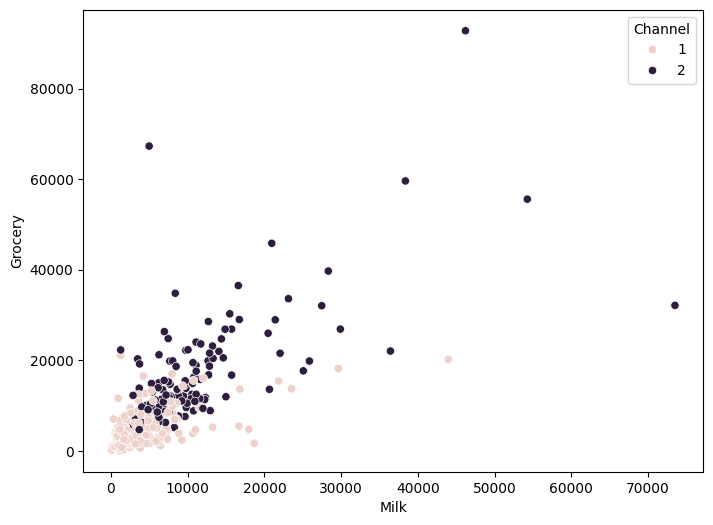

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')
plt.show()

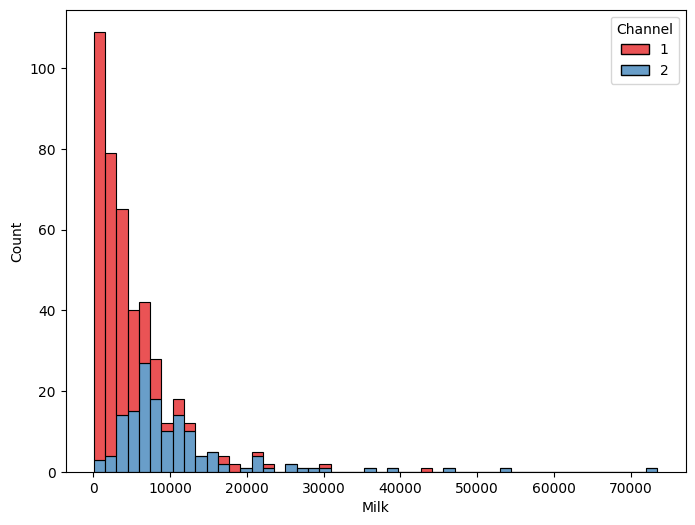

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1', multiple='stack')
plt.show()

<Figure size 800x600 with 0 Axes>

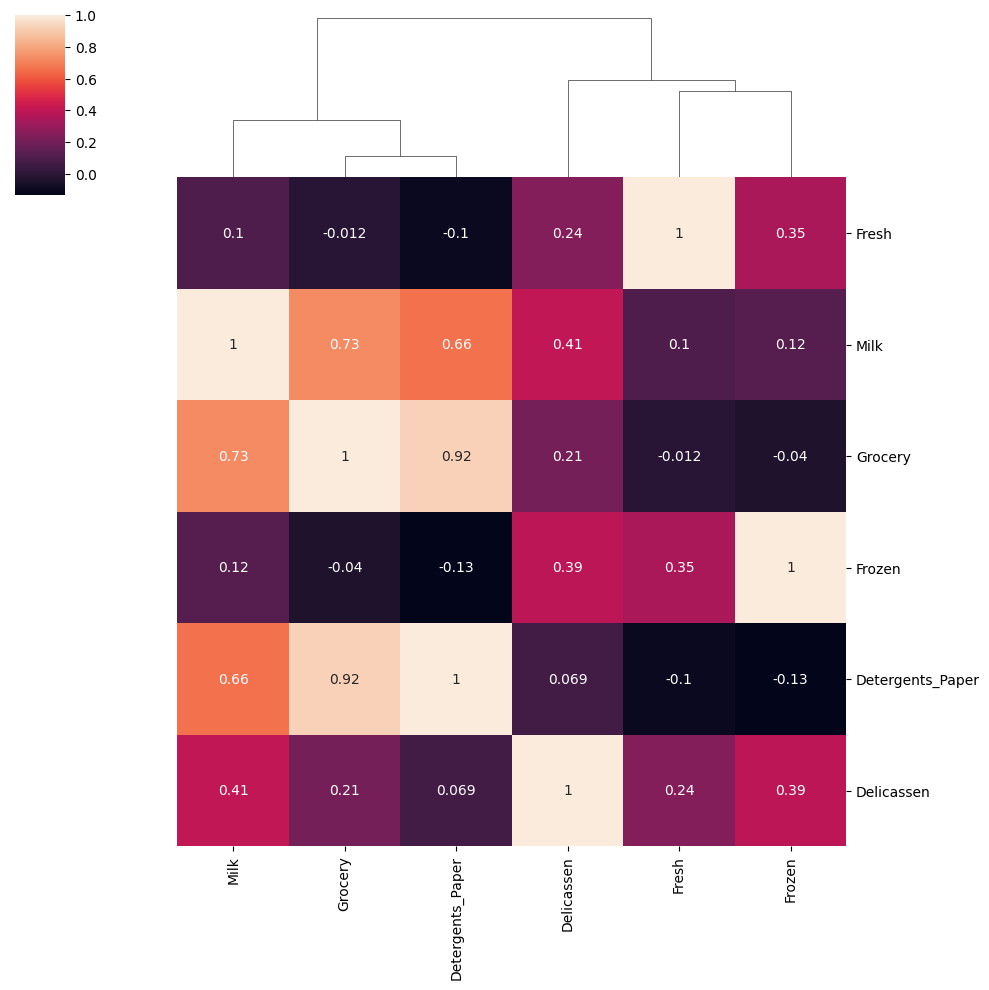

In [8]:
plt.figure(figsize=(8,6))
sns.clustermap(
    data=df.drop(['Region','Channel'], axis=1).corr(), 
    annot=True,
    row_cluster=False
)
plt.show()

<Figure size 800x600 with 0 Axes>

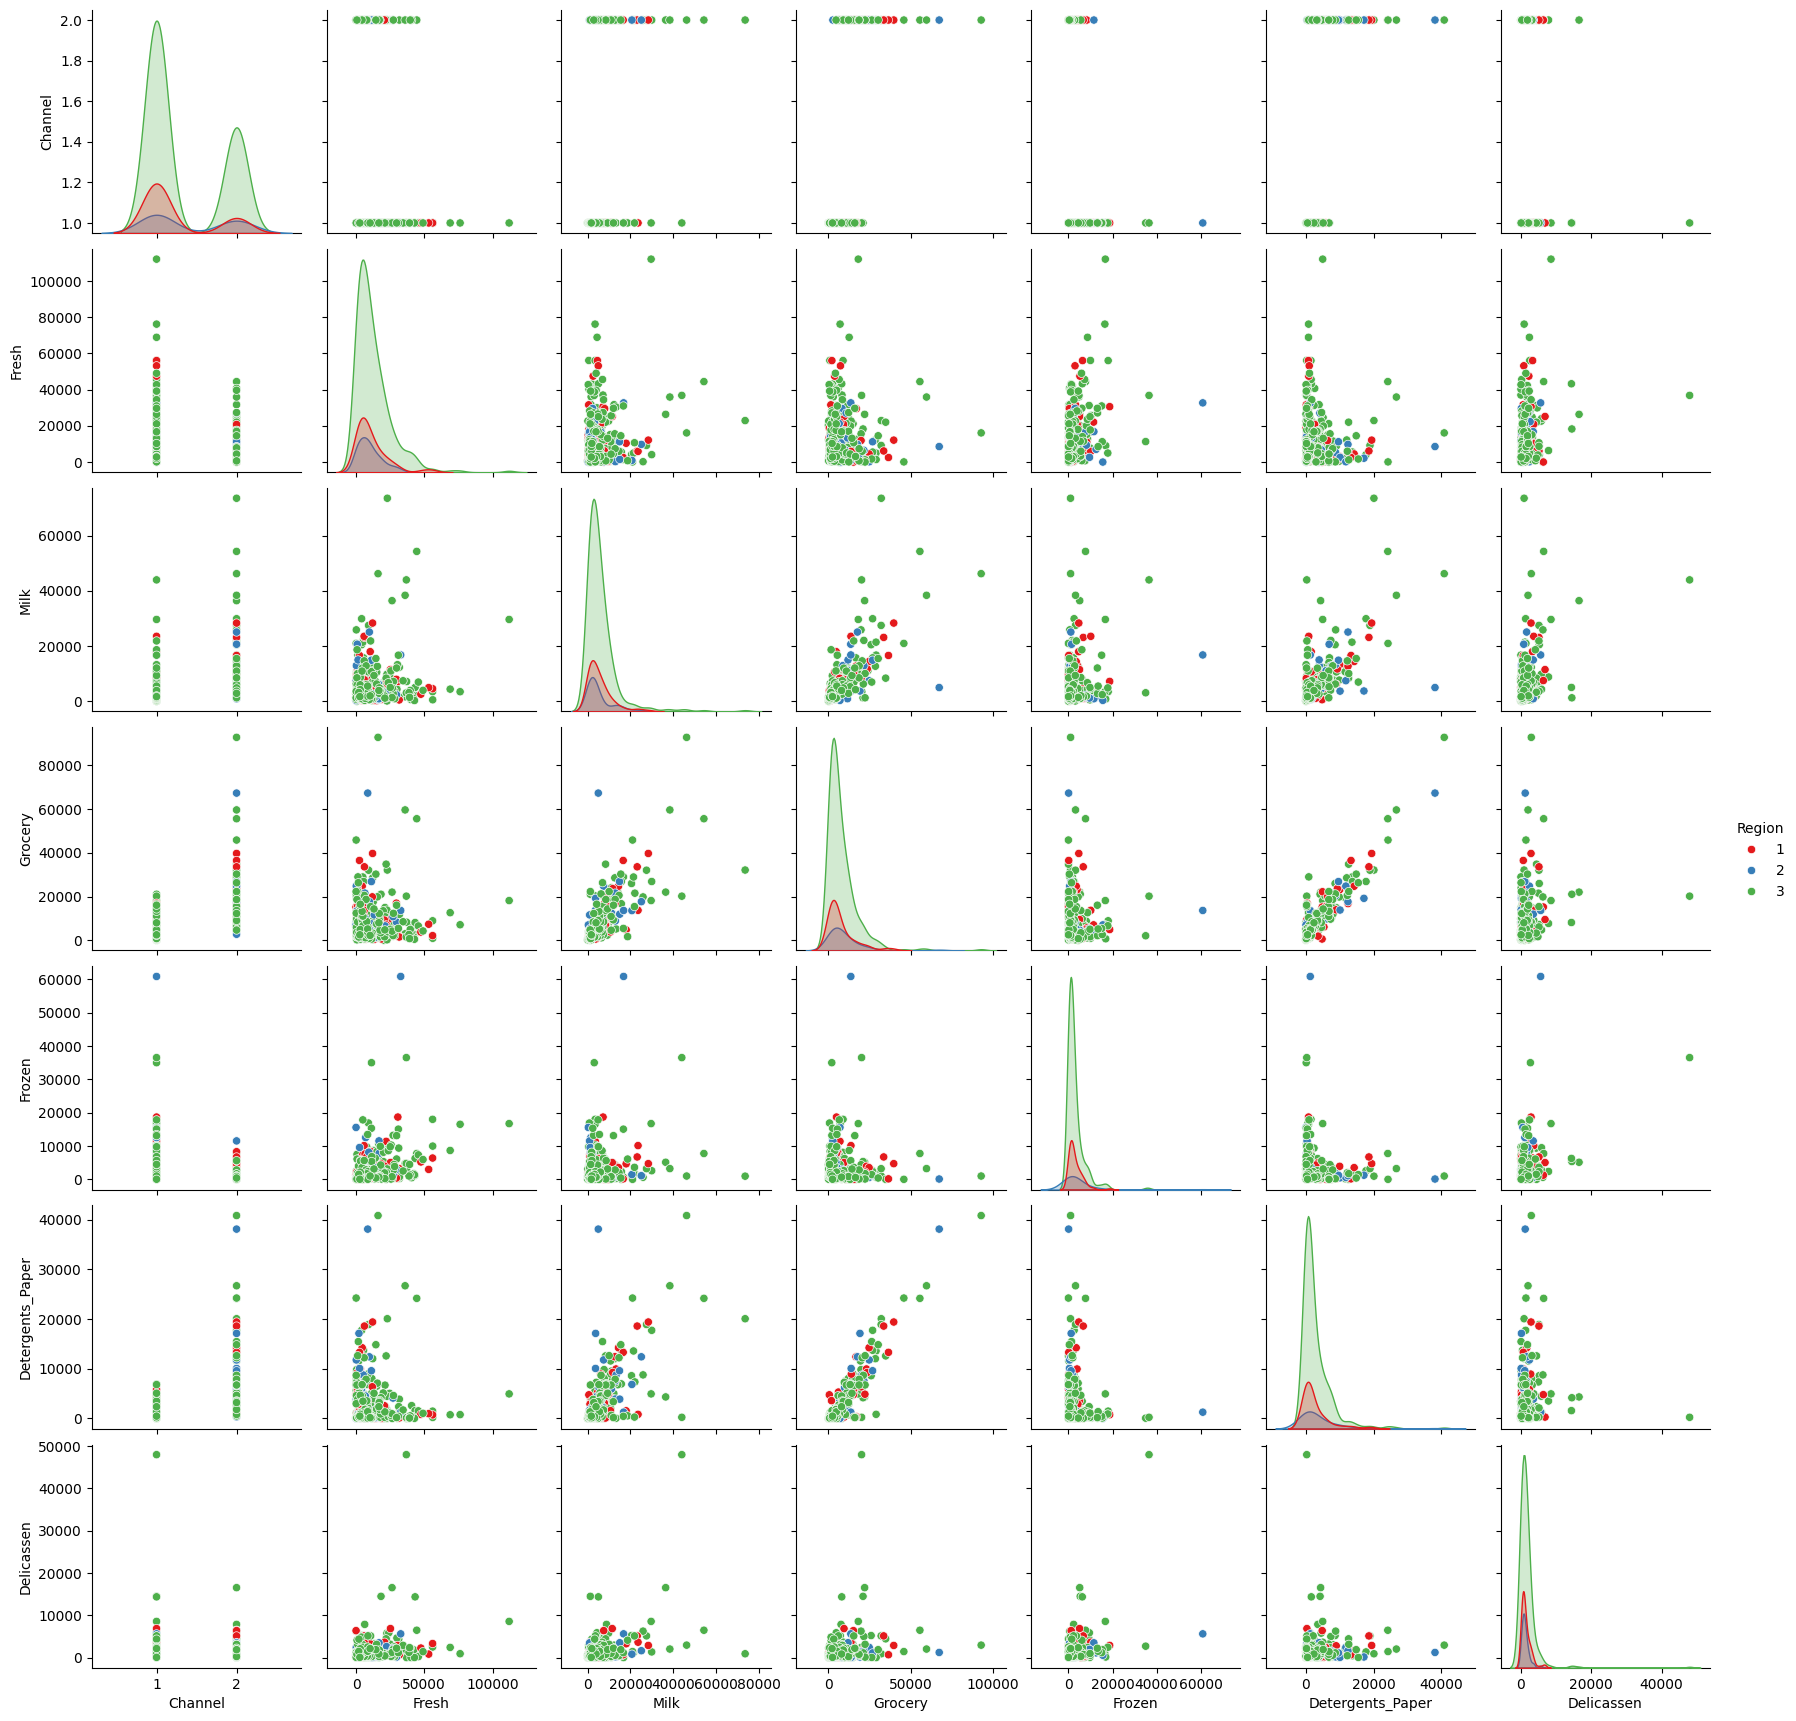

In [9]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='Region', palette='Set1')
plt.show()

<Figure size 800x600 with 0 Axes>

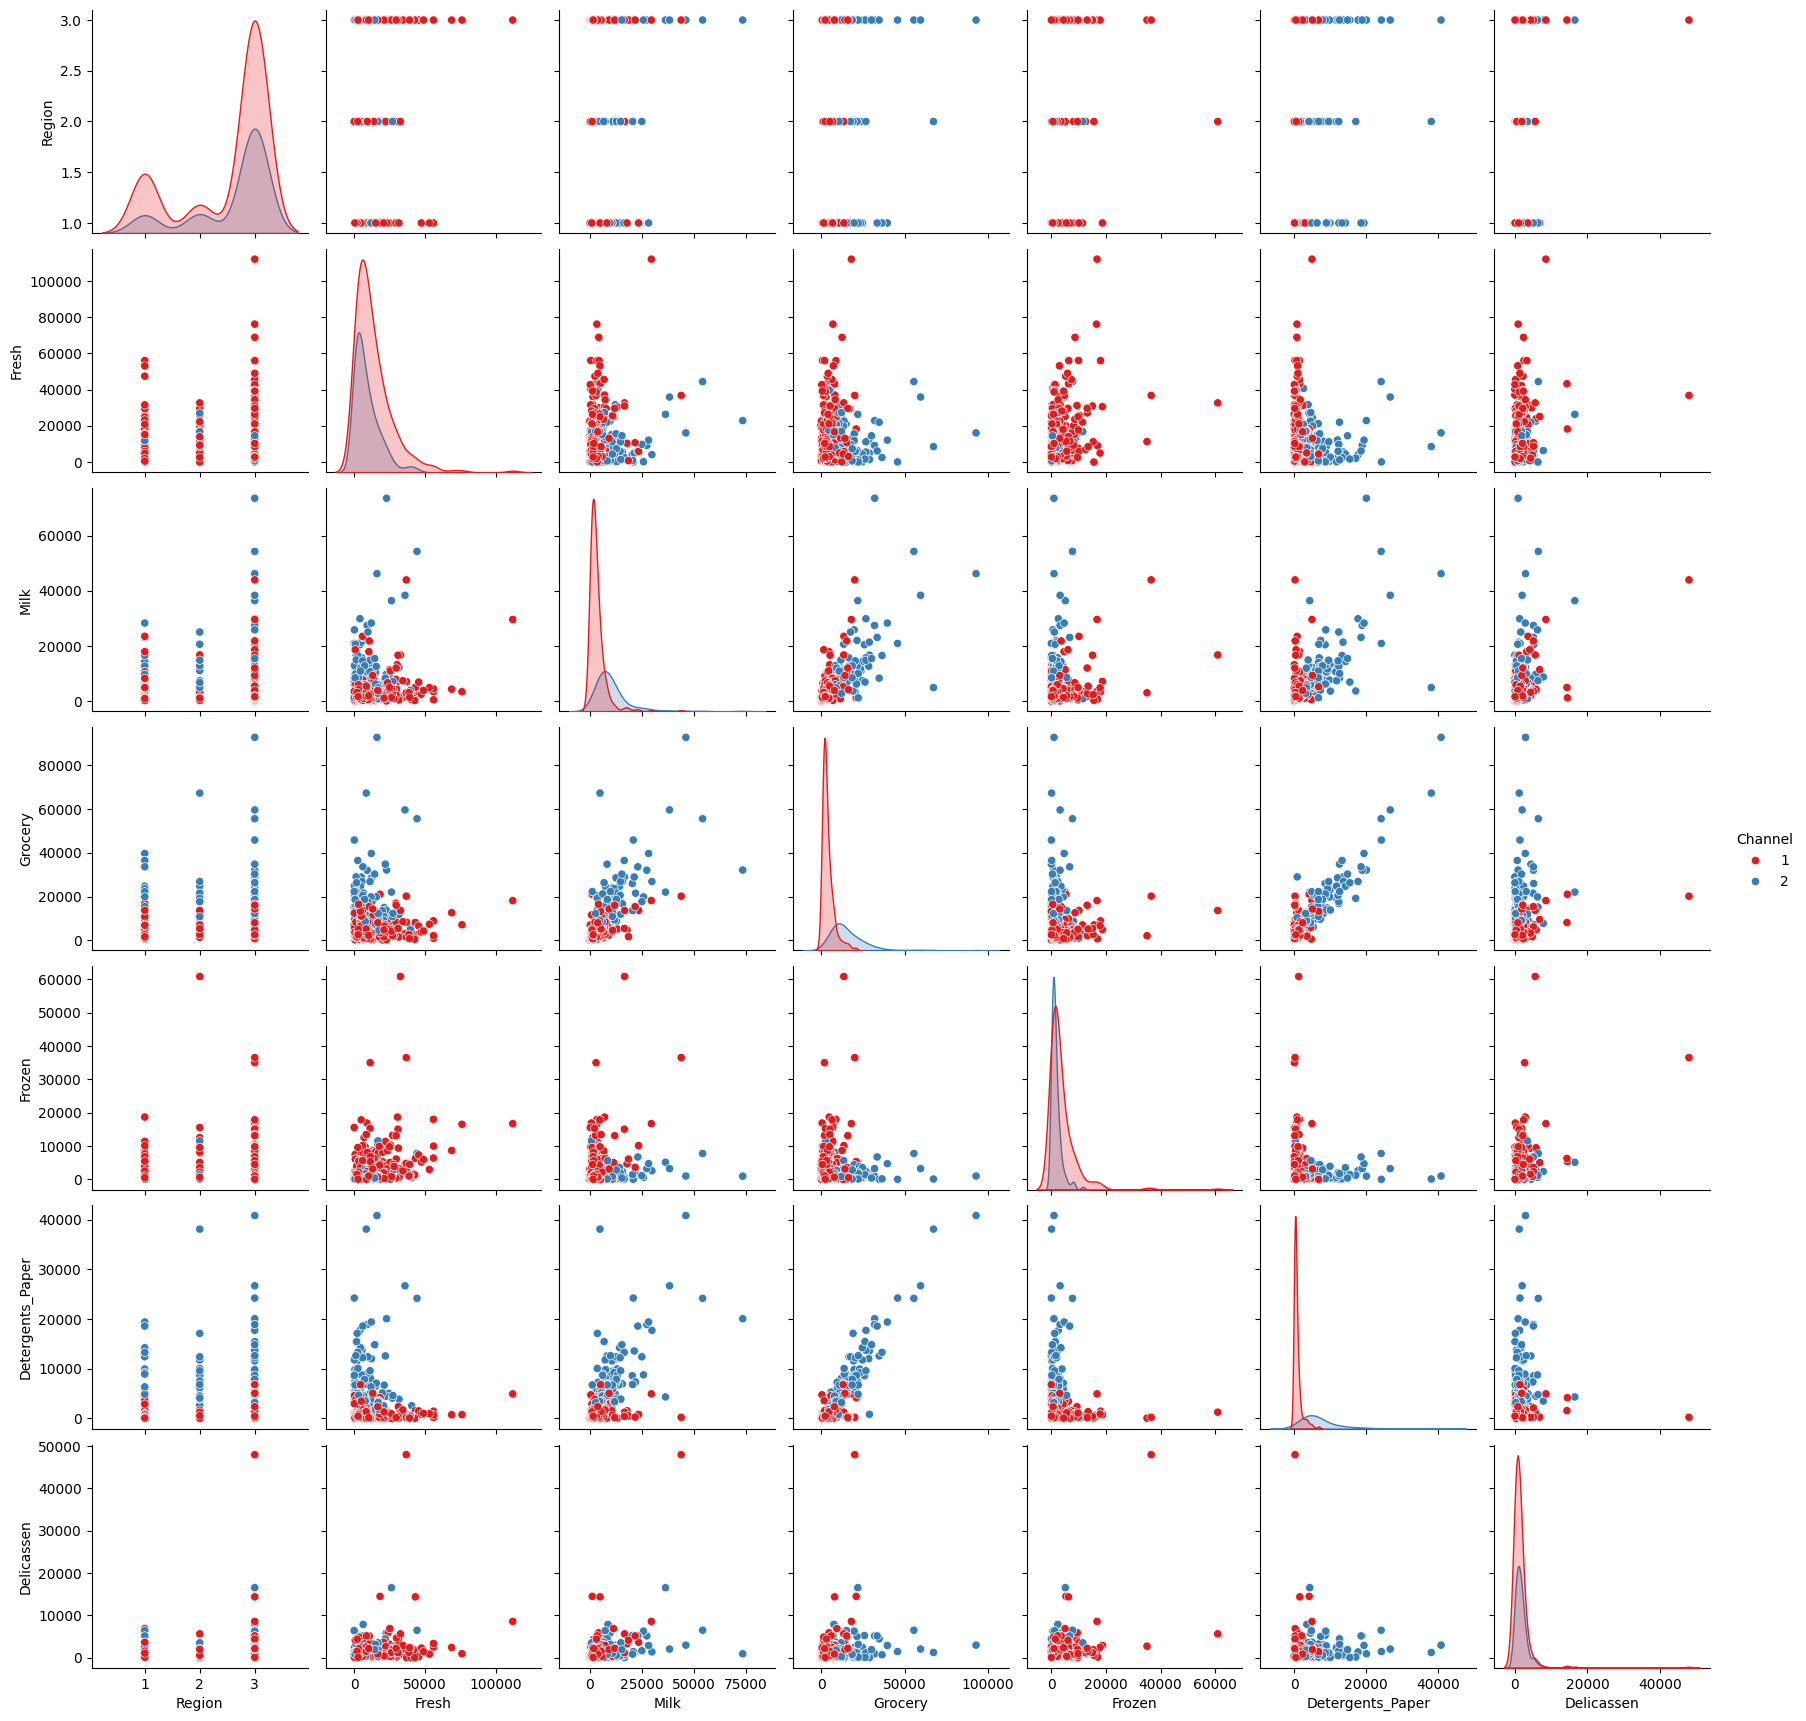

In [10]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='Channel', palette='Set1')
plt.show()

## Data Preprocessing

### Standardization

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X = scaler.fit_transform(df)

## Modeling

In [13]:
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    model = DBSCAN(
        eps=eps,
        min_samples=2*scaled_X.shape[1]
    )
    model.fit(scaled_X)

    percentage_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    outlier_percent.append(percentage_outliers)

<Axes: >

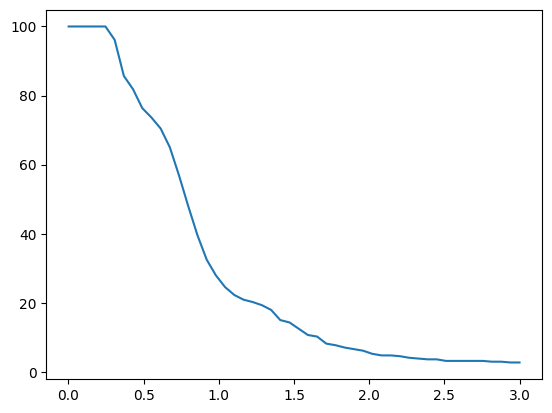

In [14]:
sns.lineplot(
    x=np.linspace(0.001, 3, 50),
    y=outlier_percent
)

In [15]:
model = DBSCAN(
    eps=2,
    min_samples=2*scaled_X.shape[1]
)

In [16]:
model.fit(scaled_X)

DBSCAN(eps=2, min_samples=16)

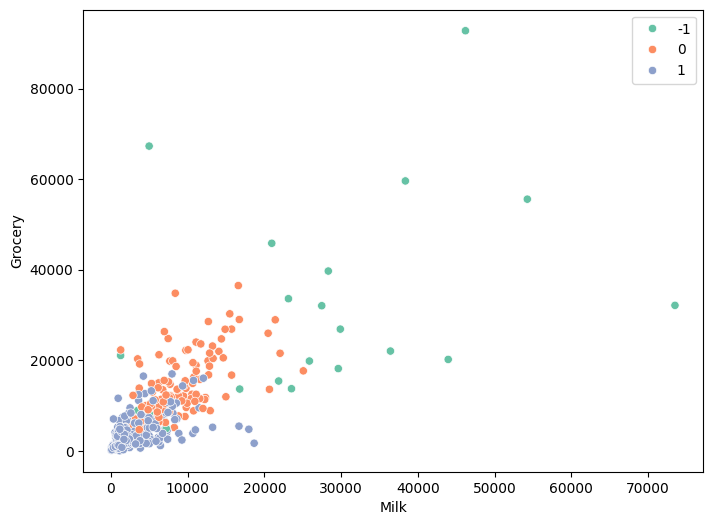

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue=model.labels_, palette='Set2')
plt.show()

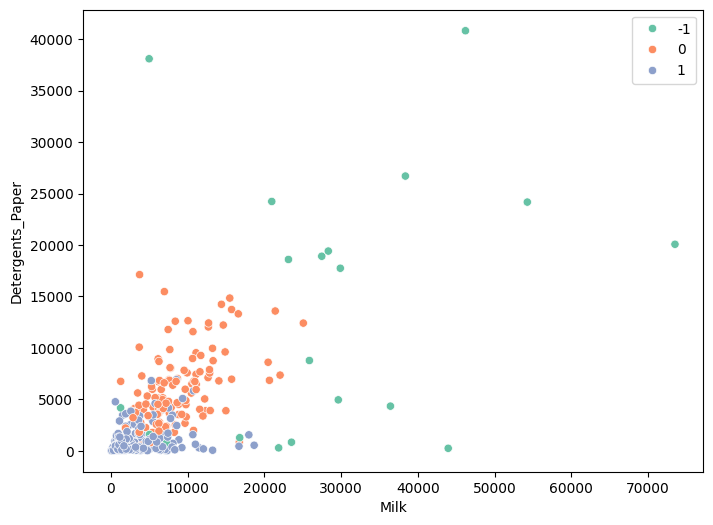

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=model.labels_, palette='Set2')
plt.show()

## Create a new Label Column

In [19]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df['Labels'] = model.labels_

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [22]:
categories = df.drop(['Channel', 'Region'], axis=1)
categories_mean = categories.groupby('Labels').mean()
categories_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


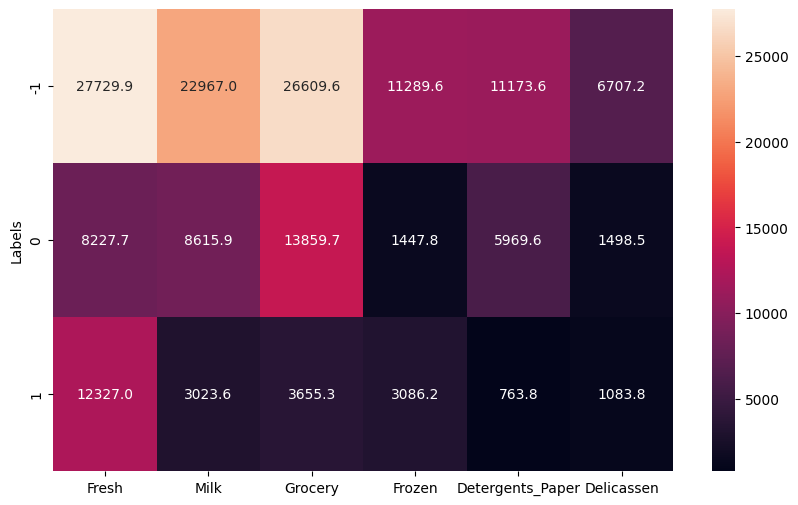

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data=categories_mean, annot=True, fmt='.1f')
plt.show()

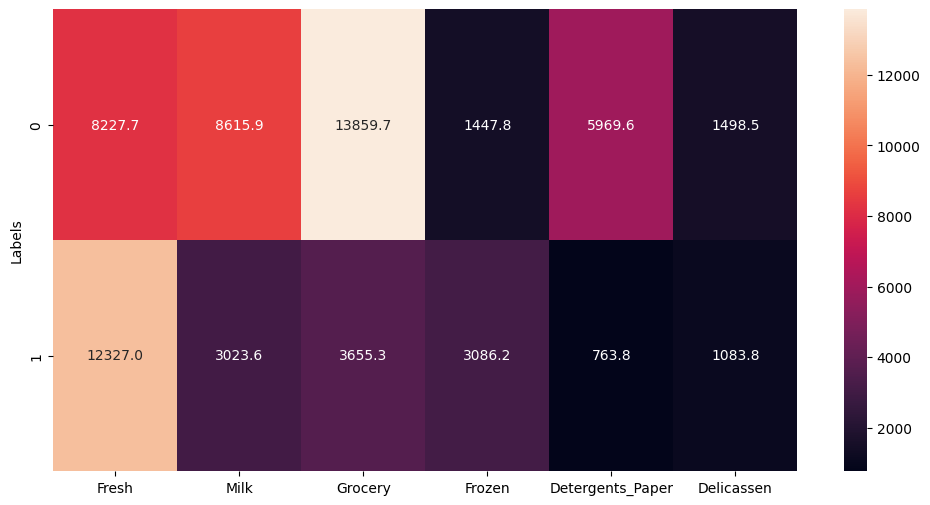

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(data=categories_mean.loc[[0,1]], annot=True, fmt='.1f')
plt.show()

### MinMax Scaler

In [25]:
categories = df.drop(['Channel', 'Region'], axis=1)
categories_mean = categories.groupby('Labels').mean()

In [26]:
scaler = MinMaxScaler()
scaled_categories_data = scaler.fit_transform(categories_mean)

In [27]:
minmax_data = pd.DataFrame(
    data=scaled_categories_data,
    index=categories_mean.index,
    columns=categories_mean.columns
)

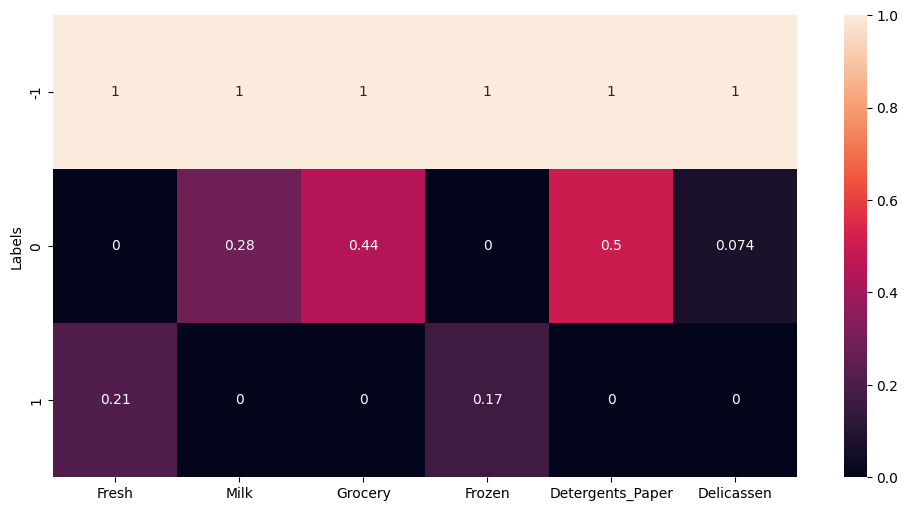

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(data=minmax_data, annot=True)
plt.show()

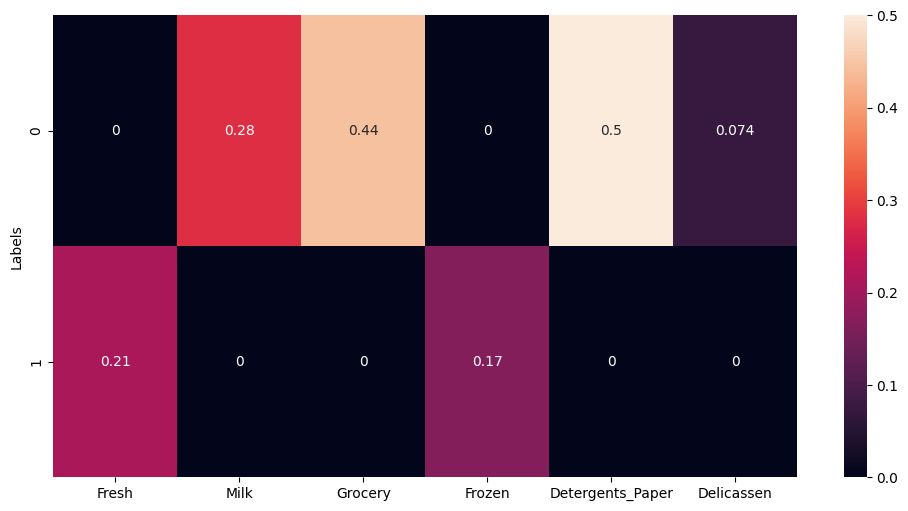

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(data=minmax_data.loc[[0,1]], annot=True)
plt.show()